In [1]:
# plot.py
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import polertiek


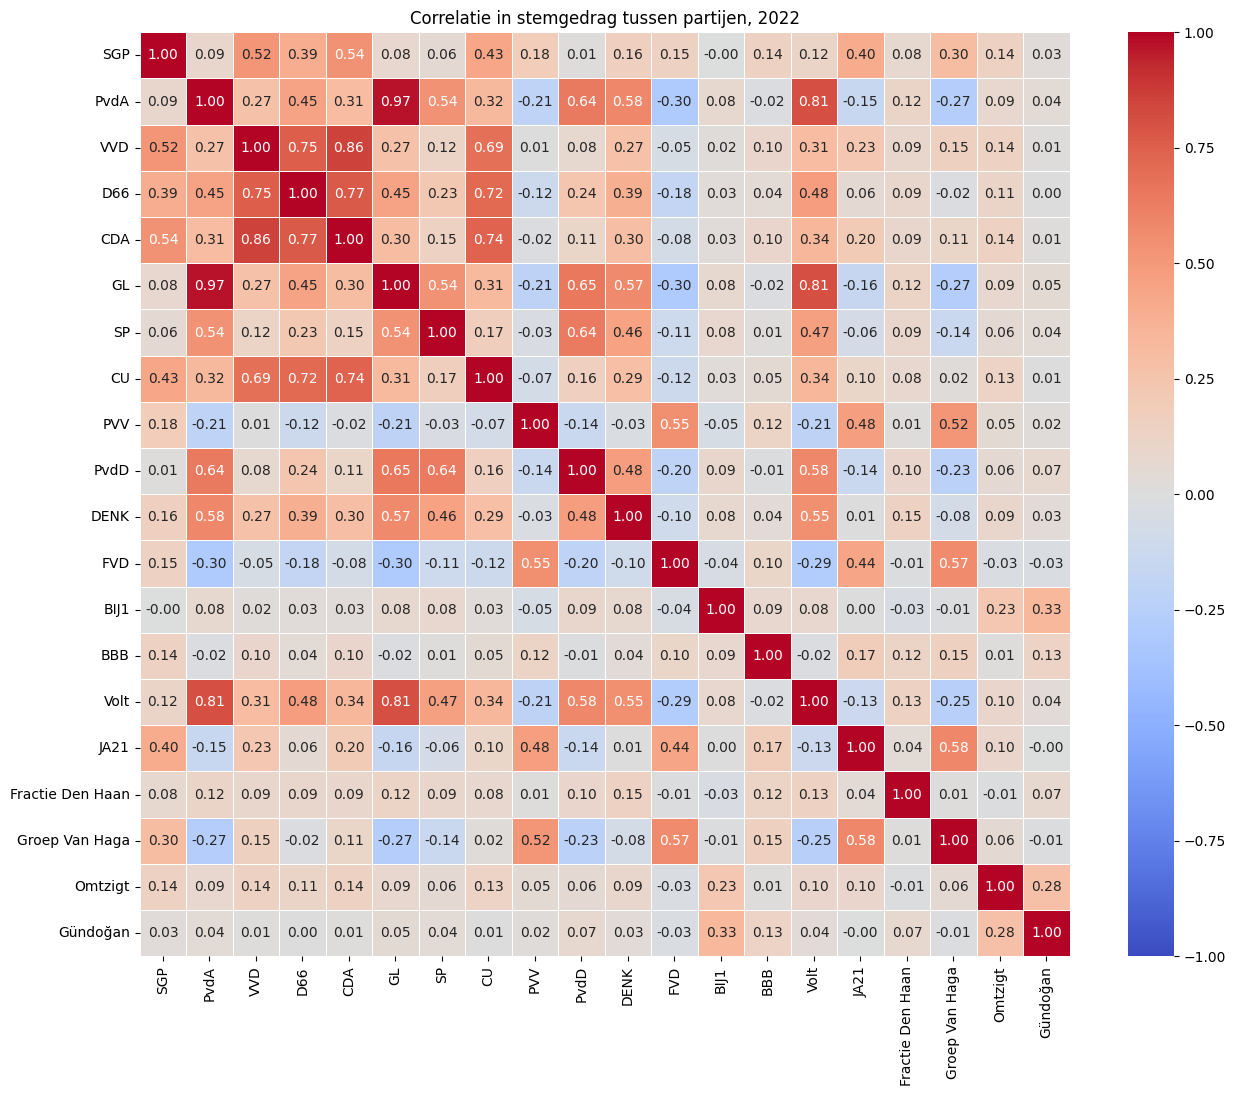

In [11]:
year = 2022
# Path to SQLite database
database_path = "../data/votes.sqlite"

# Fetch and preprocess data
df = polertiek.fetch_and_preprocess_data(database_path, year=year)

correlation_matrix_sorted = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix_sorted,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
)
plt.title(f"Correlatie in stemgedrag tussen partijen, {year}")
plt.show()


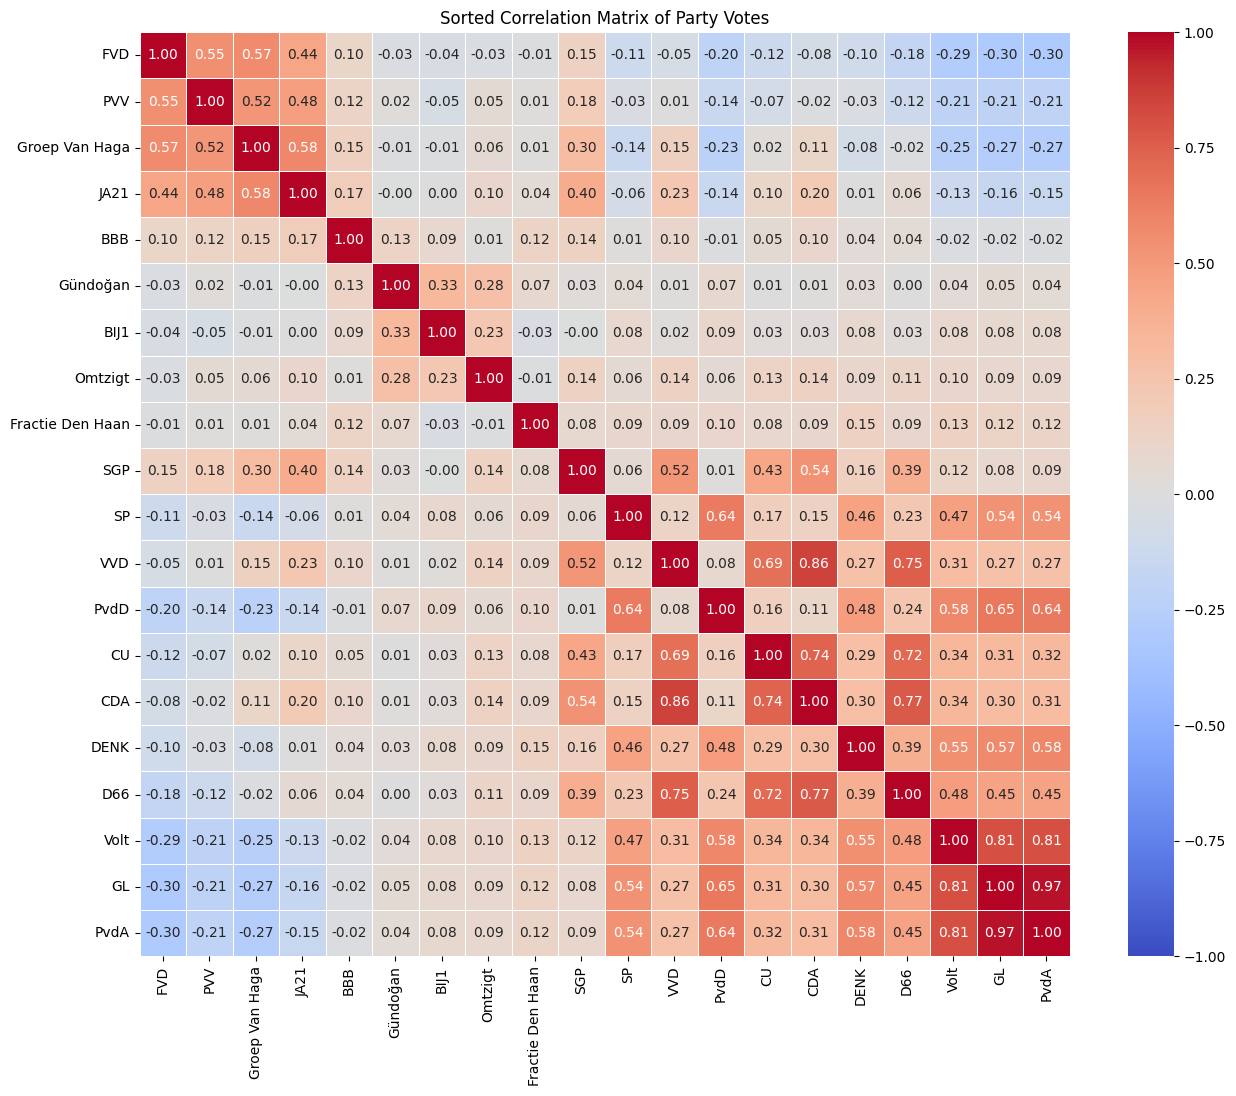

In [9]:
year = 2022
# Path to SQLite database
database_path = "../data/votes.sqlite"

# Fetch and preprocess data
df = polertiek.fetch_and_preprocess_data(database_path, year=year)

# Standardize the data
df_standardized = (df - df.mean()) / df.std()

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_standardized)

# Sort columns based on principal component loadings
sorted_columns = df.columns[pca.components_[0].argsort()]

# Reorder DataFrame columns
df_sorted = df[sorted_columns]

# Calculate the correlation matrix of the sorted DataFrame
correlation_matrix_sorted = df_sorted.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix_sorted,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
)
plt.title(f"Gesorteerde correlatie in stemgedrag tussen partijen, {year}")
plt.show()
